# <font color='blue'>**LABORATORIO 1. Visión computacional Tradicional y CNN´s aplicadas a problemas de clasificación de imágenes**

<font color='red'>Integrantes (Máximo 3 personas):

Sebastian Anderson Guerrero

Samantha Gallego Sanchez

Jesicca Lorena Arias Rios

<font color='red'>Codigo

Partiendo de la idea general que asegura que una arquitectura de red neuronal que trabaja bien para un problema de visión computacional trabajará bien para cualquier otro problema en la misma area, en este laboratorio, usted podrá basarse en alguna de estas arquitecturas (i.e, LeNet, VGG, AlexNet), para crear una CNN que le permita clasificar los digitos obtenidos del lenguajes de señas.

Usted deberá seguir las instrucciones (<font color='red'>resaltadas en rojo </font>), las cuales además de guiarlo, generarán en suma el puntaje final obtenido para este laboratorio.

Cabe resaltar que a través de este documento se estará promoviendo el uso de algunas funciones propias de Keras, ya que esta es una excelente API que permite reducir considerablemente los tiempos de experimentación.



##Librerias

In [ ]:
#Para dar un orden al trabajo realizado, coloque aqui todas las librerias que van a ser usadas. 
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.layers as LK
import tensorflow.keras.models as MK
import cv2
from google.colab.patches import cv2_imshow
from sklearn.cluster import KMeans
from scipy.spatial import distance
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, classification_report
import seaborn as sns
from tensorflow.keras import regularizers
from keras.layers.regularization.dropout import Dropout

In [ ]:
# Vamos a usar el Sign Language Digits Dataset
#By Turkey Ankara Ayrancı Anadolu High School Students.

!git clone https://github.com/ardamavi/Sign-Language-Digits-Dataset.git

Cloning into 'Sign-Language-Digits-Dataset'...
remote: Enumerating objects: 2095, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 2095 (delta 2), reused 0 (delta 0), pack-reused 2089
Receiving objects: 100% (2095/2095), 15.07 MiB | 15.46 MiB/s, done.
Resolving deltas: 100% (660/660), done.


In [ ]:
#Esta parte esta hecha para ustedes. 
#Se les pide que intenten seguir el código y entender
#lo que se hace y el porque se hace. Que tan importante es usar pathlib en este caso?

import os
import pathlib
sld_dir = pathlib.Path('Sign-Language-Digits-Dataset/Dataset/')
print(len(list(sld_dir.glob('*/*.JPG'))))


2062


##<font color='red'>Punto 1 (0.25). Lea la ayuda de la utilidad llamada **preprocessing.image_dataset_from_directory** de keras y utilicela para crear su dataset </font>. 

Lea atentamente que parametros usted puede ingresarle a la función y tambien que es lo que la misma retorna.

Use el 80% de las imagenes para entrenamiento y el 20% para validación. 

Cree los dos conjuntos: entrenamiento y validación.



In [ ]:
data_dir = 'Sign-Language-Digits-Dataset/Dataset/'

In [ ]:
#Pegue aquí el código para crear  el dataset de entrenamiento

data_train = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed = 112,
    label_mode = 'int',
    image_size = (100,100))

Found 2062 files belonging to 10 classes.
Using 1650 files for training.


In [ ]:
#Pegue aquí el código para crear  el dataset de validación

data_test = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = "validation",
    seed = 112, 
    label_mode = 'int',
    image_size = (100,100))

Found 2062 files belonging to 10 classes.
Using 412 files for validation.


##<font color='red'>Punto 2 (0.25). Observando en que consiste el conjunto de datos </font>. 

Los dos conjuntos de datos creados en el punto 1, tienen una estructura especifíca para el manejo de las imagenes y las etiquetas.

Tome como base el código que se hizo en clase para mostrar las primeras 5 imagenes del dataset de MNIST y modifiquelo, para mostrar 9 imágenes del dataset de entrenamiento (cada una de las imagenes debe presentar su etiqueta en la parte superior).

A continuación algunos Tips:


*   Suponiendo que su conjunto de entrenamiento se llame: ***sld_train***. Una forma de saber los nombres de las clases es: **nombres_clases = sld_train.class_names**

*   Si usted hace un ciclo for usando como rango por ejemplo el ***sld_train*** este devuelve dos arreglos: imagenes y etiquetas

*   Tenga en cuenta que para poder visualizar este tipo de imágenes  usted debe convertirlas, por ejemplo: **imagen[i].numpy().astype('uint8')**





In [ ]:
class_names = data_train.class_names
print(class_names)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


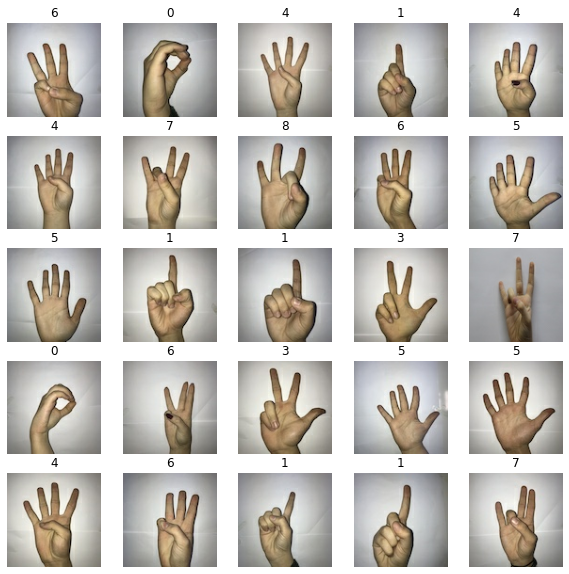

In [ ]:
#Pegue aquí su código para visualizar imágenes

plt.figure(figsize=(10, 10))
for images, labels in data_train.take(1):
  for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

## <font color='red'>Punto 3 (0.25). Lea la ayuda de la utilidad llamada **experimental.preprocessing.Rescaling** de keras y utilicela para normalizar sus conjuntos de datos</font>. 

Lea atentamente que parametros usted puede ingresarle a la función y tambien que es lo que la misma retorna.

Aunque no es algo imprescindible, si usted desea puede iterar sobre el conjunto de datos normalizados e irlos guardando en las variables x_train, y_train, x_test y y_test usadas en clase. Para lo que podría necesitar una línea de código parecida a esto: **x_train, y_train = next(iter(dato_normalizado))**

In [ ]:
#Pegue aquí su código para normalizar los datos de entrenamiento

normalization_layer = LK.Rescaling(1./255)

train_normalizado = data_train.map(lambda x, y: (normalization_layer(x), y))
x_train_b, y_train_b = next(iter(train_normalizado))

test_normalizado = data_test.map(lambda x, y: (normalization_layer(x), y))
x_test_b, y_test_b = next(iter(test_normalizado))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


##<font color='red'>Punto 4 (1.5). Cree un clasificador tradicional para el dataset dado. 

Utilice los conocimientos adquiridos en clase acerca de visión computacional tradicional: detectores/descriptores, BoVW y ANN´s para que cree, entrene y valide un CLASIFICADOR TRADICIONAL.
Recuerde obtener métricas que pueda compara con el clasificador CNN.


In [ ]:
data_train_ub = data_train.unbatch()
data_test_ub = data_test.unbatch()

In [ ]:
def unir_dataset(dataset_ub):
  x = []
  y = []

  for i, j in dataset_ub:
    x.append(i.numpy().astype("uint8"))
    y.append(j.numpy().astype("uint8"))

  x = np.array(x)
  y = np.array(y)
  return x, y

In [ ]:
x_train, y_train = unir_dataset(data_train_ub)
x_test, y_test = unir_dataset(data_test_ub)

In [ ]:
print("Imagenes de entrenamiento: {}, Etiquetas: {}" .format(x_train.shape, y_train.shape))
print("Imagenes de testeo: {}, Etiquetas: {}" .format(x_test.shape, y_test.shape))

Imagenes de entrenamiento: (1650, 100, 100, 3), Etiquetas: (1650,)
Imagenes de testeo: (412, 100, 100, 3), Etiquetas: (412,)


In [ ]:
x_train_gray = []
for i in range(len(x_train)):
  x_train_gray.append(cv2.cvtColor(x_train[i], cv2.COLOR_RGB2GRAY))
x_train_gray = np.array(x_train_gray)

x_test_gray = []
for i in range(len(x_test)):
  x_test_gray.append(cv2.cvtColor(x_test[i], cv2.COLOR_RGB2GRAY))
x_test_gray = np.array(x_test_gray)

In [ ]:
print("Imagenes de entrenamiento: {}, Etiquetas: {}" .format(x_train_gray.shape, y_train.shape))
print("Imagenes de testeo: {}, Etiquetas: {}" .format(x_test_gray.shape, y_test.shape))

Imagenes de entrenamiento: (1650, 100, 100), Etiquetas: (1650,)
Imagenes de testeo: (412, 100, 100), Etiquetas: (412,)


In [ ]:
def CrearDic(x, y):

  dic = {}

  for label in set(y):
    cat = []
    for i in range(len(x)):
      if (y[i] == label):
        cat.append(x[i])
    dic[str(label)] = cat

  return dic

In [ ]:
train = CrearDic(x_train_gray,y_train)

In [ ]:
def sift_feat(imagenes):
  sift = cv2.SIFT_create()
  sift_featXcat = {}
  sift_feat_all = []
  for key,value in imagenes.items():
    featXcat=[]
    for img in value:
      kp, desc = sift.detectAndCompute(img, None)
      sift_feat_all.extend(desc)
      featXcat.append(desc)
    sift_featXcat[key] = featXcat
  return[sift_feat_all, sift_featXcat] 

In [ ]:
sifts = sift_feat(train)

In [ ]:
feat_all = sifts[0]
train_bovw_feat = sifts[1]

In [ ]:
def kmeans(k, lista):
  kmeans = KMeans(n_clusters = k)
  kmeans.fit(lista)
  visual_words  = kmeans.cluster_centers_
  return visual_words

In [ ]:
k = 50   # Número de palabras
visual_words = kmeans(k, feat_all)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
print(visual_words.shape)

(50, 128)


In [ ]:
def find_idx(feat, center):
  count=0
  ind=0
  for i in range(len(center)):
    if (i==0):
      count = distance.euclidean(feat, center[i])
    else:
      dist = distance.euclidean(feat, center[i])
      if (dist < count):
        ind = i
        count=dist
  return ind

In [ ]:
def img_clases(bovw_feat, centers):
  dict_feat = {}
  for key, value in bovw_feat.items():
    imagens = []
    for img in value:
      histo = np.zeros(len(centers))
      for each_feat in img:
        idx = find_idx(each_feat, centers)
        histo[idx] += 1
      imagens.append(histo)
    dict_feat[key] = imagens
  return dict_feat

In [ ]:
bovw_train = img_clases(train_bovw_feat, visual_words)

In [ ]:
def preparar_datos(diccio):
  y = []
  x = []
  for key, values in diccio.items():
    for histo in values:
      x.append(histo)
      y.append(key)
  return np.array(x), np.array(y)

In [ ]:
x_train_red, y_train_red = preparar_datos(bovw_train)

In [ ]:
print(x_train_red.shape)
print(y_train_red.shape)

(1650, 50)
(1650,)


In [ ]:
test = CrearDic(x_test_gray, y_test)

In [ ]:
test_bovw_feat = sift_feat(test)[1]

In [ ]:
bovw_test = img_clases(test_bovw_feat, visual_words)

In [ ]:
x_test_red, y_test_red = preparar_datos(bovw_test)

In [ ]:
print(x_test_red.shape)
print(y_test_red.shape)

(412, 50)
(412,)


In [ ]:
std = StandardScaler().fit(x_train_red)
x_train_red = std.transform(x_train_red)

In [ ]:
x_test_red = std.transform(x_test_red)

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(80,5), activation='relu', solver='adam', max_iter=1)
n_epochs = 600
N_CLASSES = np.unique(y_train_red)

accuracy_mlp = []
accuracy_test_mlp = []

for i in range(n_epochs):
  mlp.partial_fit(x_train_red, y_train_red, classes=N_CLASSES)

  accuracy_mlp.append(mlp.score(x_train_red, y_train_red))
  accuracy_test_mlp.append(mlp.score(x_test_red, y_test_red))

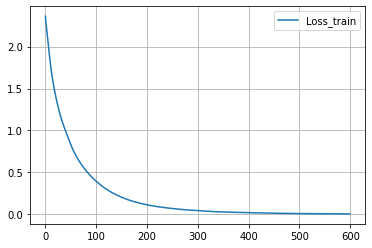

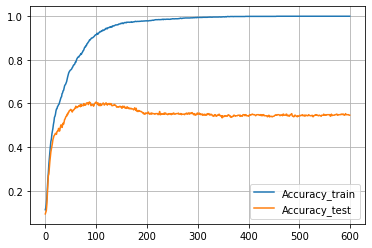

In [ ]:
plt.plot(mlp.loss_curve_, label = 'Loss_train')
plt.legend()
plt.grid()
plt.show()

plt.plot(accuracy_mlp, label = 'Accuracy_train')
plt.plot(accuracy_test_mlp, label = 'Accuracy_test')
plt.legend()
plt.grid()
plt.show()

In [ ]:
p = mlp.predict(x_test_red)

In [ ]:
acc_test = accuracy_score(y_test_red, p)
print('El accuracy de nuestra red es de:', str(acc_test))

El accuracy de nuestra red es de: 0.5461165048543689


In [ ]:
M = confusion_matrix(y_test_red, p)

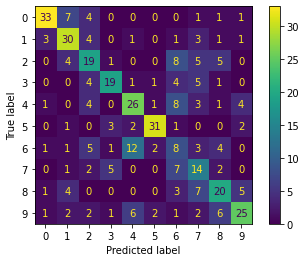

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix = M,
                              display_labels = mlp.classes_)
disp.plot()
plt.show()

In [ ]:
print(classification_report(y_test_red, p))

              precision    recall  f1-score   support

           0       0.82      0.70      0.76        47
           1       0.60      0.68      0.64        44
           2       0.43      0.45      0.44        42
           3       0.63      0.54      0.58        35
           4       0.54      0.54      0.54        48
           5       0.84      0.78      0.81        40
           6       0.20      0.22      0.21        37
           7       0.33      0.45      0.38        31
           8       0.49      0.50      0.49        40
           9       0.66      0.52      0.58        48

    accuracy                           0.55       412
   macro avg       0.55      0.54      0.54       412
weighted avg       0.57      0.55      0.55       412



##<font color='red'>Punto 5 (0.25). Creando su arquitectura básica de CNN</font>. 

Cree una arquitectura basado en alguno de los modelos propuestos. Para esta parte su modelo debe estar completo (todas las capas convolucionales, pooling y fully conected), pero no deben tener ningún tipo de regularización.

De una explicación corta acerca (No más de 10 líneas) de la arquitectura usada y el porqué de su selección.

Muestre al final el resumen de su modelo y escoja el método de optimización que va a ser usado (este puede ser modificado en el transcurso de los entrenamientos, si usted lo considera necesario)

In [ ]:
x_train_n = (x_train - x_train.min())/(x_train.max()-x_train.min())
x_test_n = (x_test - x_test.min())/(x_test.max()-x_test.min())

In [ ]:
#Realice aqui su modelo de CNN
#Creamos el modelo Lenet
entrada = LK.Input(shape=(100,100,3))
conv1 = LK.Conv2D(6,5,padding='same',activation='relu')(entrada)
pool1 = LK.MaxPool2D((2,2),(2,2))(conv1)
conv2 = LK.Conv2D(16,5,padding='valid',activation='relu')(pool1)
pool2 = LK.MaxPool2D((2,2),(2,2))(conv2)
flat = LK.Flatten()(pool2)
fc1 = LK.Dense(120,activation='relu')(flat)
fc2 = LK.Dense(84,activation='relu')(fc1)
salida = LK.Dense(10,activation='sigmoid')(fc2)

modelo = MK.Model(entrada,salida)
modelo.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 100, 100, 6)       456       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 8464)              0     

In [ ]:
optimo= 'adam'
modelo.compile(optimizer=optimo, loss='categorical_crossentropy',metrics=['accuracy'] )

In [ ]:
#Cambio y_train y y_test
num_classes = 10
y_train_ohe = keras.utils.to_categorical(y_train,num_classes)
y_test_ohe = keras.utils.to_categorical(y_test,num_classes)

In [ ]:
history = modelo.fit(x_train_n, y_train_ohe, epochs=25, batch_size=64, validation_data=(x_test_n,y_test_ohe), verbose=1)
loss, acc = modelo.evaluate(x_test_n,y_test_ohe, verbose=1)
print('Loss:{0} - Accuracy:{1}'.format(loss,acc))

Epoch 1/25
26/26 [==============================] - 11s 37ms/step - loss: 2.0514 - accuracy: 0.2745 - val_loss: 1.4963 - val_accuracy: 0.5583
Epoch 2/25
26/26 [==============================] - 0s 14ms/step - loss: 1.0008 - accuracy: 0.6642 - val_loss: 0.8268 - val_accuracy: 0.7233
Epoch 3/25
26/26 [==============================] - 0s 14ms/step - loss: 0.6840 - accuracy: 0.7709 - val_loss: 0.8664 - val_accuracy: 0.7354
Epoch 4/25
26/26 [==============================] - 0s 15ms/step - loss: 0.5363 - accuracy: 0.8267 - val_loss: 0.6940 - val_accuracy: 0.7670
Epoch 5/25
26/26 [==============================] - 1s 20ms/step - loss: 0.4287 - accuracy: 0.8582 - val_loss: 0.6374 - val_accuracy: 0.7743
Epoch 6/25
26/26 [==============================] - 0s 18ms/step - loss: 0.3547 - accuracy: 0.8855 - val_loss: 0.5924 - val_accuracy: 0.8180
Epoch 7/25
26/26 [==============================] - 1s 20ms/step - loss: 0.3250 - accuracy: 0.8891 - val_loss: 0.5403 - val_accuracy: 0.8204
Epoch 8/25
2

##<font color='red'>Punto *6* (0.5). Entrenando y validando su modelo CNN</font>. 

Entrene su modelo básico, obtenga los gráficos de accuracy y loss y saque sus propias conclusiones.



In [ ]:
#Muestre las gráficas y métricas aquí

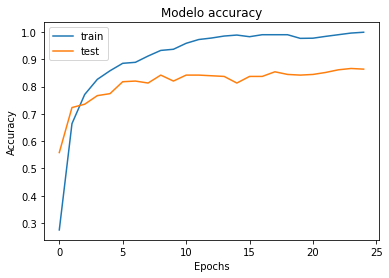

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Modelo accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','test'], loc='upper left')
plt.show()

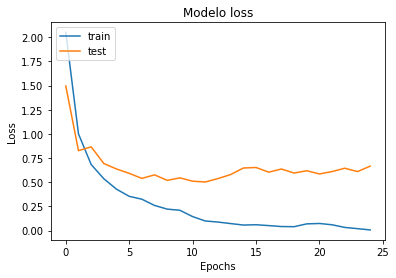

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Modelo loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
p = modelo.predict(x_test_n)

13/13 [==============================] - 0s 4ms/step


In [ ]:
loss, acc = modelo.evaluate(x_test_n,y_test_ohe, verbose=1)
print('Loss:{0} - Accuracy:{1}'.format(loss,acc))

13/13 [==============================] - 0s 5ms/step - loss: 0.6668 - accuracy: 0.8641
Loss:0.6667625904083252 - Accuracy:0.8640776872634888


In [ ]:
M = confusion_matrix(y_test, p.argmax(1))

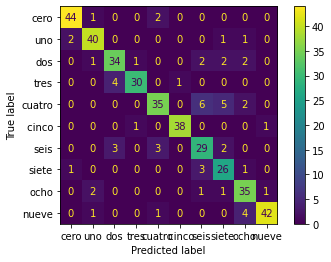

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix = M,
                              display_labels =['cero', 'uno', 'dos', 'tres', 'cuatro', ' cinco', 'seis', 'siete', 'ocho', 'nueve'])
disp.plot()
plt.show()

In [ ]:
print(classification_report(y_test, p.argmax(1)))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        47
           1       0.89      0.91      0.90        44
           2       0.83      0.81      0.82        42
           3       0.94      0.86      0.90        35
           4       0.85      0.73      0.79        48
           5       0.97      0.95      0.96        40
           6       0.71      0.78      0.74        37
           7       0.70      0.84      0.76        31
           8       0.78      0.88      0.82        40
           9       0.95      0.88      0.91        48

    accuracy                           0.86       412
   macro avg       0.86      0.86      0.85       412
weighted avg       0.86      0.86      0.86       412



##<font color='red'>Punto **7** (1.0). Mejorando su CNN</font>. 

Haga uso de los metodos de regularización que usted considere convenientes (puede ser más de uno), de tal forma que consiga reducir considerablemente el overfitting.

Usted puede entrenar la red las veces que usted desee cambiando los metodos de regularización, pero asegurese de dejar plasmados en este trabajo dos modelos diferentes (por lógica deben ser los dos mejores)

Realice una tabla comparativa mostrando las diferencias entre su modelo CNN base, los dos modelos con regularización y el modelo tradicional.

###Drop

In [ ]:
#Dropout
entrada = LK.Input(shape=(100,100,3))
conv1 = LK.Conv2D(6,5,padding='same',activation='relu')(entrada)
pool1 = LK.MaxPool2D((2,2),(2,2))(conv1)
conv2 = LK.Conv2D(16,5,padding='valid',activation='relu')(pool1)
drop = LK.Dropout(0.3)(conv2)
pool2 = LK.MaxPool2D((2,2),(2,2))(drop)
flat = LK.Flatten()(pool2)
fc1 = LK.Dense(120,activation='relu')(flat)
drop2 = LK.Dropout(0.3)(fc1)
fc2 = LK.Dense(84,activation='relu')(drop2)
salida = LK.Dense(10,activation='sigmoid')(fc2)

modelo_drop = MK.Model(entrada,salida)
modelo_drop.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 conv2d_2 (Conv2D)           (None, 100, 100, 6)       456       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 50, 50, 6)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 46, 46, 16)        2416      
                                                                 
 dropout (Dropout)           (None, 46, 46, 16)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 23, 23, 16)       0         
 2D)                                                       

In [ ]:
#Compilar el modelo
modelo_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_drop = modelo_drop.fit(x_train_n, y_train_ohe, epochs=50, batch_size=64, validation_data=(x_test_n,y_test_ohe), verbose=1)


Epoch 1/50
26/26 [==============================] - 3s 37ms/step - loss: 2.0947 - accuracy: 0.2642 - val_loss: 1.5681 - val_accuracy: 0.5850
Epoch 2/50
26/26 [==============================] - 1s 26ms/step - loss: 1.1407 - accuracy: 0.6194 - val_loss: 0.8749 - val_accuracy: 0.7306
Epoch 3/50
26/26 [==============================] - 1s 25ms/step - loss: 0.7794 - accuracy: 0.7242 - val_loss: 0.7489 - val_accuracy: 0.7670
Epoch 4/50
26/26 [==============================] - 1s 22ms/step - loss: 0.6244 - accuracy: 0.7988 - val_loss: 0.5920 - val_accuracy: 0.8252
Epoch 5/50
26/26 [==============================] - 1s 20ms/step - loss: 0.4799 - accuracy: 0.8394 - val_loss: 0.5597 - val_accuracy: 0.8131
Epoch 6/50
26/26 [==============================] - 1s 22ms/step - loss: 0.4238 - accuracy: 0.8624 - val_loss: 0.4836 - val_accuracy: 0.8374
Epoch 7/50
26/26 [==============================] - 0s 19ms/step - loss: 0.3314 - accuracy: 0.8897 - val_loss: 0.4537 - val_accuracy: 0.8714
Epoch 8/50
26

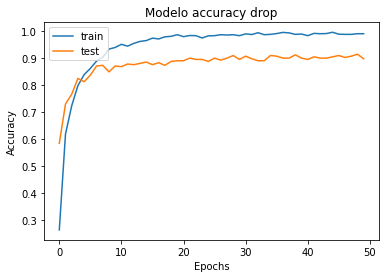

In [ ]:
plt.plot(history_drop.history['accuracy'])
plt.plot(history_drop.history['val_accuracy'])
plt.title('Modelo accuracy drop')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','test'], loc='upper left')
plt.show()

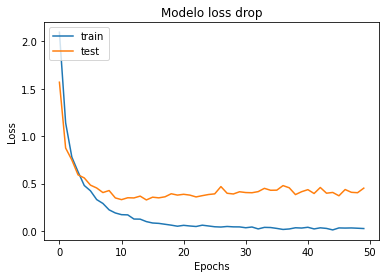

In [ ]:
plt.plot(history_drop.history['loss'])
plt.plot(history_drop.history['val_loss'])
plt.title('Modelo loss drop')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
p_drop = modelo_drop.predict(x_test_n)

13/13 [==============================] - 0s 4ms/step


In [ ]:
loss_drop, acc_drop = modelo_drop.evaluate(x_test_n,y_test_ohe, verbose=1)
print('Loss:{0} - Accuracy:{1}'.format(loss_drop,acc_drop))

13/13 [==============================] - 0s 8ms/step - loss: 0.4520 - accuracy: 0.8981
Loss:0.4519743025302887 - Accuracy:0.8980582356452942


In [ ]:
M_drop = confusion_matrix(y_test, p_drop.argmax(1))

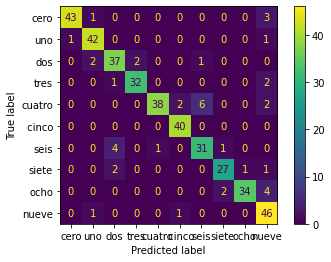

In [ ]:
disp_drop = ConfusionMatrixDisplay(confusion_matrix = M_drop,
                              display_labels =['cero', 'uno', 'dos', 'tres', 'cuatro', ' cinco', 'seis', 'siete', 'ocho', 'nueve'])
disp_drop.plot()
plt.show()

In [ ]:
print(classification_report(y_test, p_drop.argmax(1)))

              precision    recall  f1-score   support

           0       0.98      0.91      0.95        47
           1       0.91      0.95      0.93        44
           2       0.84      0.88      0.86        42
           3       0.94      0.91      0.93        35
           4       0.97      0.79      0.87        48
           5       0.93      1.00      0.96        40
           6       0.82      0.84      0.83        37
           7       0.90      0.87      0.89        31
           8       0.97      0.85      0.91        40
           9       0.78      0.96      0.86        48

    accuracy                           0.90       412
   macro avg       0.90      0.90      0.90       412
weighted avg       0.90      0.90      0.90       412



###Drop L2

In [ ]:
#Dropout L2
entrada = LK.Input(shape=(100,100,3))
conv1 = LK.Conv2D(6,5,padding='same',activation='relu', kernel_regularizer=regularizers.L2(0.01))(entrada)
pool1 = LK.MaxPool2D((2,2),(2,2))(conv1)
conv2 = LK.Conv2D(16,5,padding='same',activation='relu', kernel_regularizer=regularizers.L2(0.01))(pool1)
drop = LK.Dropout(0.3)(conv2)
pool2 = LK.MaxPool2D((2,2),(2,2))(drop)
flat = LK.Flatten()(pool2)
fc1 = LK.Dense(120,activation='relu', kernel_regularizer=regularizers.L2(0.01))(flat)
drop2 = LK.Dropout(0.3)(fc1)
fc2 = LK.Dense(84,activation='relu', kernel_regularizer=regularizers.L2(0.01))(drop2)
salida = LK.Dense(10,activation='sigmoid')(fc2)

modelo_drop_l2 = MK.Model(entrada,salida)
modelo_drop_l2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 conv2d_4 (Conv2D)           (None, 100, 100, 6)       456       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 50, 50, 6)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 50, 50, 16)        2416      
                                                                 
 dropout_2 (Dropout)         (None, 50, 50, 16)        0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 25, 25, 16)       0         
 2D)                                                       

In [ ]:
#Compilar el modelo
modelo_drop_l2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_drop_l2 = modelo_drop_l2.fit(x_train_n, y_train_ohe, epochs=50, batch_size=64, validation_data=(x_test_n,y_test_ohe), verbose=1)


Epoch 1/50
26/26 [==============================] - 8s 68ms/step - loss: 4.3358 - accuracy: 0.1321 - val_loss: 3.4372 - val_accuracy: 0.1748
Epoch 2/50
26/26 [==============================] - 1s 29ms/step - loss: 2.9383 - accuracy: 0.2958 - val_loss: 2.3403 - val_accuracy: 0.6262
Epoch 3/50
26/26 [==============================] - 1s 27ms/step - loss: 1.9304 - accuracy: 0.5945 - val_loss: 1.6900 - val_accuracy: 0.6893
Epoch 4/50
26/26 [==============================] - 1s 24ms/step - loss: 1.5600 - accuracy: 0.7079 - val_loss: 1.4965 - val_accuracy: 0.7354
Epoch 5/50
26/26 [==============================] - 1s 26ms/step - loss: 1.3880 - accuracy: 0.7515 - val_loss: 1.3219 - val_accuracy: 0.8058
Epoch 6/50
26/26 [==============================] - 1s 28ms/step - loss: 1.2502 - accuracy: 0.7752 - val_loss: 1.2667 - val_accuracy: 0.7985
Epoch 7/50
26/26 [==============================] - 1s 24ms/step - loss: 1.1814 - accuracy: 0.7782 - val_loss: 1.1583 - val_accuracy: 0.8204
Epoch 8/50
26

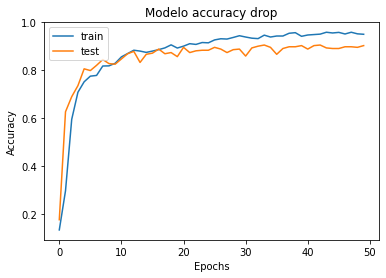

In [ ]:
plt.plot(history_drop_l2.history['accuracy'])
plt.plot(history_drop_l2.history['val_accuracy'])
plt.title('Modelo accuracy drop')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','test'], loc='upper left')
plt.show()

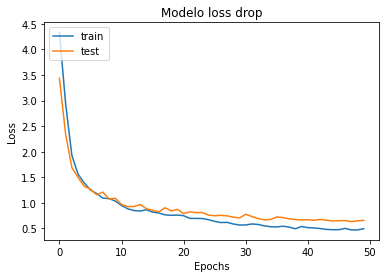

In [ ]:
plt.plot(history_drop_l2.history['loss'])
plt.plot(history_drop_l2.history['val_loss'])
plt.title('Modelo loss drop')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
p_drop_l2 = modelo_drop_l2.predict(x_test_n)

13/13 [==============================] - 0s 6ms/step


In [ ]:
loss_drop_l2, acc_drop_l2 = modelo_drop_l2.evaluate(x_test_n,y_test_ohe, verbose=1)
print('Loss:{0} - Accuracy:{1}'.format(loss_drop_l2,acc_drop_l2))

13/13 [==============================] - 0s 8ms/step - loss: 0.6573 - accuracy: 0.9029
Loss:0.6572962403297424 - Accuracy:0.9029126167297363


In [ ]:
M_drop_l2 = confusion_matrix(y_test, p_drop_l2.argmax(1))

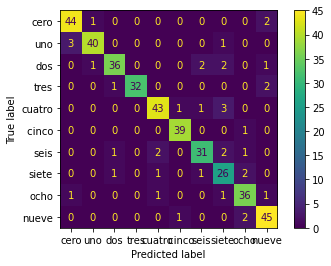

In [ ]:
disp_drop_l2 = ConfusionMatrixDisplay(confusion_matrix = M_drop_l2,
                              display_labels =['cero', 'uno', 'dos', 'tres', 'cuatro', ' cinco', 'seis', 'siete', 'ocho', 'nueve'])
disp_drop_l2.plot()
plt.show()

In [ ]:
print(classification_report(y_test, p_drop_l2.argmax(1)))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93        47
           1       0.95      0.91      0.93        44
           2       0.92      0.86      0.89        42
           3       1.00      0.91      0.96        35
           4       0.91      0.90      0.91        48
           5       0.95      0.97      0.96        40
           6       0.89      0.84      0.86        37
           7       0.74      0.84      0.79        31
           8       0.86      0.90      0.88        40
           9       0.88      0.94      0.91        48

    accuracy                           0.90       412
   macro avg       0.90      0.90      0.90       412
weighted avg       0.91      0.90      0.90       412



###Comparación

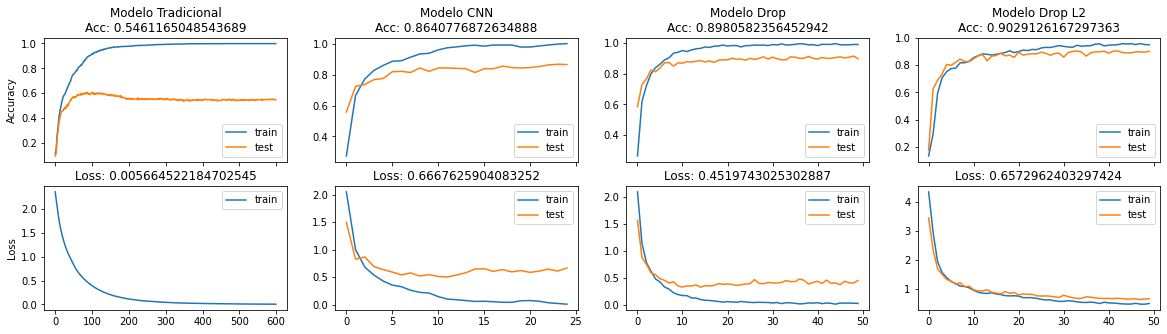

In [ ]:
plt.figure(figsize=(20,5))

plt.subplot(2,4,1)
plt.plot(accuracy_mlp, label = 'Accuracy_train')
plt.plot(accuracy_test_mlp, label = 'Accuracy_test')
plt.title('Modelo Tradicional\nAcc: '+str(acc_test))
plt.ylabel('Accuracy')
plt.gca().set_xticklabels([])
plt.legend(['train','test'], loc='lower right')

plt.subplot(2,4,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Modelo CNN\nAcc: '+str(acc))
plt.gca().set_xticklabels([])
plt.legend(['train','test'], loc='lower right')

plt.subplot(2,4,3)
plt.plot(history_drop.history['accuracy'])
plt.plot(history_drop.history['val_accuracy'])
plt.title('Modelo Drop\nAcc: '+str(acc_drop))
plt.gca().set_xticklabels([])
plt.legend(['train','test'], loc='lower right')

plt.subplot(2,4,4)
plt.plot(history_drop_l2.history['accuracy'])
plt.plot(history_drop_l2.history['val_accuracy'])
plt.title('Modelo Drop L2\nAcc: '+str(acc_drop_l2))
plt.gca().set_xticklabels([])
plt.legend(['train','test'], loc='lower right')

plt.subplot(2,4,5)
plt.plot(mlp.loss_curve_, label = 'Loss_train')
plt.title('Loss: '+str(mlp.loss_))
plt.ylabel('Loss')
plt.legend(['train'], loc='upper right')

plt.subplot(2,4,6)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss: '+str(loss))
plt.legend(['train','test'], loc='upper right')

plt.subplot(2,4,7)
plt.plot(history_drop.history['loss'])
plt.plot(history_drop.history['val_loss'])
plt.title('Loss: '+str(loss_drop))
plt.legend(['train','test'], loc='upper right')

plt.subplot(2,4,8)
plt.plot(history_drop_l2.history['loss'])
plt.plot(history_drop_l2.history['val_loss'])
plt.title('Loss: '+str(loss_drop_l2))
plt.legend(['train','test'], loc='upper right')
plt.show()

#<font color='red'>Punto 8 (1.0). Pruebas adicionales de su mejor Clasificador</font>. 

Realice un conjunto de 20 imagenes, mostrando diferentes digitos del lenguaje de señas. Realice un programa que permita leer las imagenes, pre-procesarlas y dejarlas listas para servir de entrada a su mejor clasificador.  Muestre las imagenes procesadas y el valor de predicción de su red con porcentaje. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!cp -r /content/drive/MyDrive/CVwDL_20231/Prueba_lab1 /content/

In [ ]:
prueba_dir = pathlib.Path('/content/Prueba_lab1/')
print(len(list(prueba_dir.glob('*/*.jpg'))))

20


In [ ]:
prueba_dir = '/content/Prueba_lab1/'

In [ ]:
#Pegue aquí el código para crear  el dataset de entrenamiento

data_prueba = tf.keras.utils.image_dataset_from_directory(
    prueba_dir,
    label_mode = 'int',
    image_size = (100,100))

Found 20 files belonging to 10 classes.


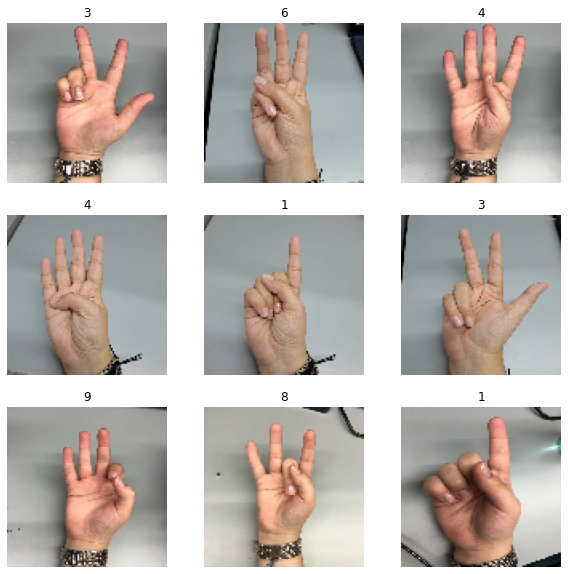

In [ ]:
#Pegue aquí su código para visualizar imágenes

plt.figure(figsize=(10, 10))
for images, labels in data_prueba.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
data_prueba_ub = data_prueba.unbatch()

In [ ]:
x_prueba, y_prueba = unir_dataset(data_prueba_ub)

In [ ]:
print("Imagenes de prueba: {}, Etiquetas: {}" .format(x_prueba.shape, y_prueba.shape))

Imagenes de prueba: (20, 100, 100, 3), Etiquetas: (20,)


In [ ]:
x_prueba_n = (x_prueba - x_prueba.min())/(x_prueba.max()-x_prueba.min())

In [ ]:
num_classes = 10
y_prueba_ohe = keras.utils.to_categorical(y_prueba, num_classes)

In [ ]:
p_prueba = modelo_drop.predict(x_prueba_n)

1/1 [==============================] - 0s 21ms/step


In [ ]:
acc_prueba = modelo_drop.evaluate(x_prueba_n, y_prueba_ohe)[1]
print('Accuracy:{}'.format(acc_prueba))

1/1 [==============================] - 0s 117ms/step - loss: 0.9801 - accuracy: 0.9000
Accuracy:0.8999999761581421


In [ ]:
M_prueba = confusion_matrix(y_prueba, p_prueba.argmax(1))

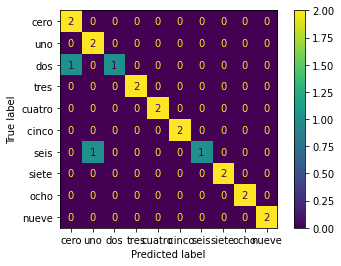

In [ ]:
disp_prueba = ConfusionMatrixDisplay(confusion_matrix = M_prueba,
                              display_labels =['cero', 'uno', 'dos', 'tres', 'cuatro', ' cinco', 'seis', 'siete', 'ocho', 'nueve'])
disp_prueba.plot()
plt.show()

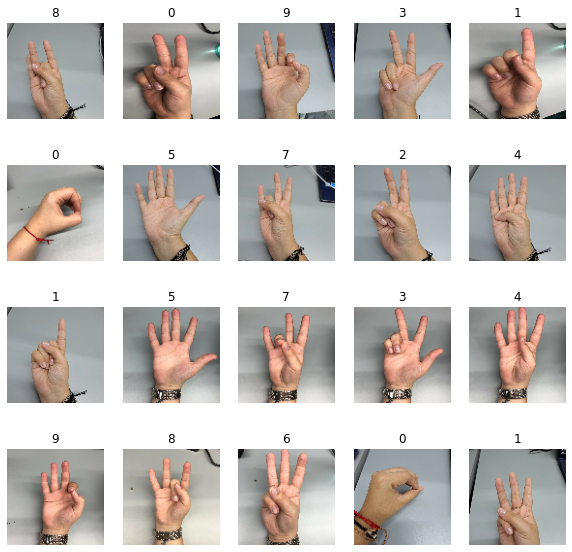

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(0,20):
  plt.subplot(4,5,i+1)
  plt.imshow(x_prueba_n[i])
  plt.title(p_prueba[i].argmax())
  plt.axis("off")
plt.show()

In [ ]:
print(classification_report(y_prueba, p_prueba.argmax(1)))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       0.67      1.00      0.80         2
           2       1.00      0.50      0.67         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      0.50      0.67         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2

    accuracy                           0.90        20
   macro avg       0.93      0.90      0.89        20
weighted avg       0.93      0.90      0.89        20

